In [1]:
import os
os.environ['PATH'] = '/home/jovyan/my-conda-envs/test/bin:' + os.environ['PATH']
os.environ['PROJ_LIB'] = '/home/jovyan/my-conda-envs/qiime2-2019.1/share/proj'
import lasio 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import biota.plot as bpl 
import seaborn as sns

In [2]:
DNAMarkers = pd.read_csv('silvertip_DNA_markers.csv', index_col=0)

In [3]:
# prepare for stair plot of DNA stratigraphy
for depth1, depth2 in zip(DNAMarkers.index[:-1], DNAMarkers.index[1:]):
    DNAMarkers.loc[(depth1+depth2)/2-0.0001] = DNAMarkers.loc[depth1]
    DNAMarkers.loc[(depth1+depth2)/2+0.0001] = DNAMarkers.loc[depth2]
DNAMarkers.sort_index(inplace=True)

In [4]:
# assign a unique color to each of the top 30 DNA markers
color_list = plt.cm.tab20c(np.linspace(0,1,30))
colors_dict = {k: v for k,v in zip(DNAMarkers.columns, color_list)}

In [5]:
# read well logs from the .LAS file
las = lasio.read('SILVERTIP_76_7_UNIT_A_8H.LAS')

In [6]:
# convert LAS file to a pandas DataFrame
Logs = las.df()

In [7]:
formations = pd.read_csv('Silvertip_Tops_TVD_updated.csv', index_col=0)

In [8]:
Logs['Formation'] = 'NA'

In [9]:
# assign formation to each log reading based on coarse formation tops
for i, r in formations.iterrows():
    Logs.loc[(Logs.index >= r['min']) & (Logs.index <= r['max']), 'Formation'] = i

In [10]:
# calculate average properties for each formation
AvgProp = Logs.groupby('Formation').mean().copy()

In [11]:
AvgProp = AvgProp.loc[AvgProp.index != 'NA']

In [25]:
# logs to be plotted: Gamma Ray, Resistivity, Density Porosity
LogNames = ['XGR','PT_PHIE','PT_SWE', 'PT_HCPV', 'PT_LOG_TOC']
LogColors = ['grey','limegreen','blue','darkgreen','darkred']
LogTitle = ['Gamma\nRay','Effective\nPorosity','Effective\nWater\nSaturation','Hydrocarbon\nPore Volume','TOC']
LogMin = [25,0,0,0,0]
LogMax = [125,0.15,1,0.1,6]

In [13]:
# logs to be plotted: Gamma Ray, Resistivity, Density Porosity
LogNames = ['XGR','PT_PHIE','PT_SWE', 'XPE']
LogColors = ['grey','limegreen','blue','red']
LogTitle = ['Gamma\nRay','Effective\nPorosity','Effective\nWater\nSaturation','XPE']
LogMin = [25,0,0,2]
LogMax = [125,0.15,1,5]

In [14]:
# read DNA formation contributions from file
DNAContrib = pd.read_csv('silvertip_drainage_heights_by_tvd.csv')

In [15]:
# read DNA formation contributions from file (using TVDs with >=5 replicates)
#DNAContrib2 = pd.read_csv('silvertip_drainage_heights_high_replicates_formation_level_by_tvd_20190207.csv')

In [16]:
wellorder = ['silvertip.76.7.unit.a.7h',
                   'silvertip.76.7.unit.a.4h',
                   'silvertip.76.7.unit.a.10h']

In [17]:
well_landing = {# "silvertip.76.7.unit.a.7h": # Blinded,
                "silvertip.76.7.unit.a.4h": "WFMP_ALPHA_W1SD_T",
                "silvertip.76.7.unit.a.10h": "WFMP_BETA_T"}

In [18]:
wellorder_old = ['silvertip.76.7.unit.a.3h',
                   'silvertip.76.7.unit.a.1h',
                   'silvertip.76.7.unit.a.2h',
                   'silvertip.76.7.unit.a.4h',
                   'silvertip.76.7.unit.a.5h',
                   'silvertip.76.7.unit.a.6h',
                   'silvertip.76.7.unit.a.7h',
                   'silvertip.76.7.unit.a.8h',
                   'silvertip.76.7.unit.a.9h',
                   'silvertip.76.7.unit.a.10h',
                   'silvertip.76.7.unit.b.2h',
                   'silvertip.76.7.unit.b.3h']

In [19]:
well_landing_old = {# "silvertip.76.7.unit.a.3h": # Blinded,
                # "silvertip.76.7.unit.a.1h": # Blinded,
                # "silvertip.76.7.unit.a.2h": # Blinded,
                "silvertip.76.7.unit.a.4h": "WFMP_ALPHA_W1SD_T",
                "silvertip.76.7.unit.a.5h": "WFMP_BETA_T",
                "silvertip.76.7.unit.a.6h": "WFMP_DELTA_T",
                # "silvertip.76.7.unit.a.7h": # Blinded,
                "silvertip.76.7.unit.a.8h": "WFMP_BETA_100_T",
                # "silvertip.76.7.unit.a.9h": # Blinded,
                "silvertip.76.7.unit.a.10h": "WFMP_BETA_T",
                "silvertip.76.7.unit.b.2h": "WFMP_BETA_100_T",
                "silvertip.76.7.unit.b.3h": "WFMP_ALPHA_W1SD_T"}

In [20]:
# lithology logs
Lithology = Logs.iloc[:,7:11]

In [21]:
Lithology_colors = ['gray','brown','aqua','lightyellow']

In [31]:
# logs to be plotted: Gamma Ray, Resistivity, Density Porosity
LogNames = ['XGR','PT_PHIE','PT_SWE', 'PT_LOG_TOC']
LogColors = ['limegreen','navy','blue','grey']
LogTitle = ['Gamma\nRay','Effective\nPorosity','Effective\nWater\nSaturation','TOC']
LogMin = [25,0,0,0]
LogMax = [125,0.15,1,6]

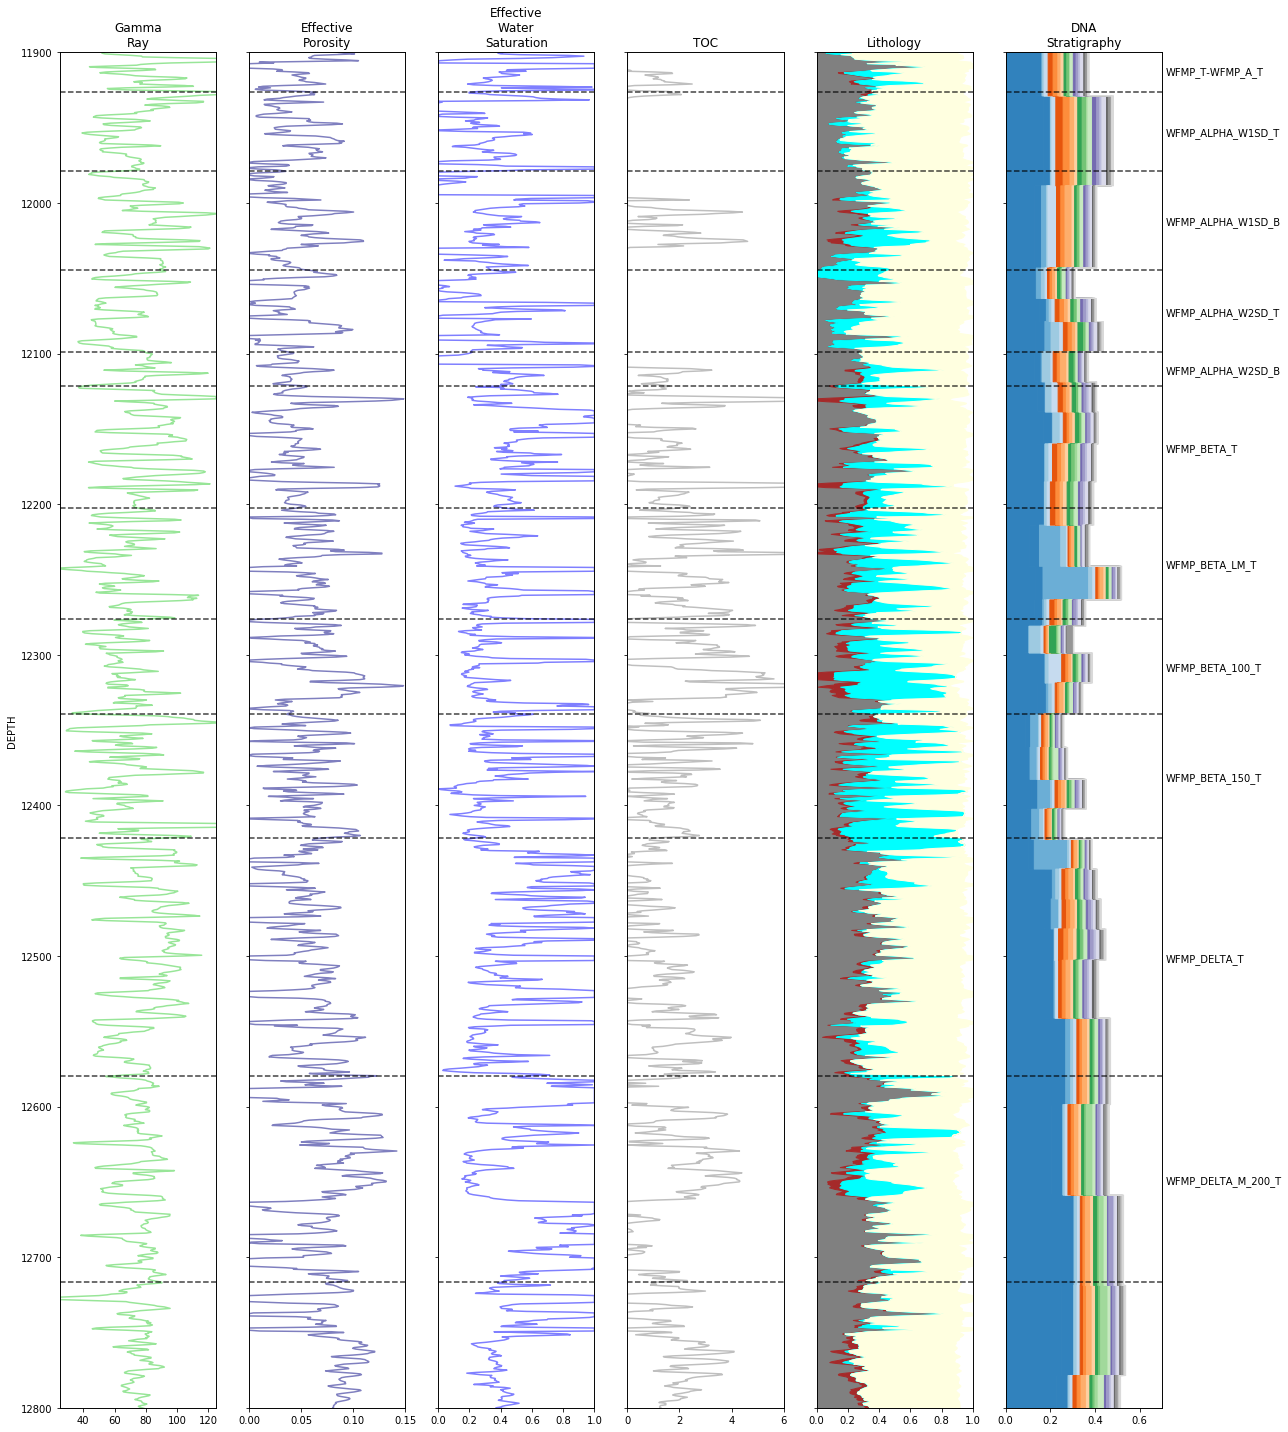

In [44]:
#n = len(LogNames)+2+len(wellorder)

upperylim =11900
lowerylim = 12800
n = len(LogNames)+2
fig, axes = plt.subplots(1,n, figsize=(18,20))
axes = axes.ravel()

# plot petrophysical logs
for log, LogName in enumerate(LogNames):
    axes[log].plot(Logs[LogName], Logs.index, c=LogColors[log], alpha=0.5)       
    axes[log].set_ylim(upperylim,lowerylim)
    #axes[log].set_xlim(LogMin[log],LogMax[log])
    axes[log].set_xlim(LogMin[log],LogMax[log])
    axes[log].invert_yaxis()
    if log==0:
        axes[log].set(ylabel='DEPTH', xlabel='', title=LogTitle[log])
    else:
        axes[log].set_yticklabels([])
        axes[log].set(title=LogTitle[log])
        axes[log].titlesize:24
        
# plot lithology
left = pd.Series(index=Lithology.index).fillna(0)
for e, c in enumerate(Lithology.columns[0:4]):
    axes[log+1].fill_betweenx(Lithology[c].index, left, left + Lithology[c],
                 color=Lithology_colors[e])
    left += Lithology[c]
axes[log+1].set(xlim=(0, 1))
axes[log+1].set_ylim(upperylim,lowerylim)
axes[log+1].invert_yaxis()
axes[log+1].set(title='Lithology')
axes[log+1].set_yticklabels([])

# plot DNA Stratigraphy
left = pd.Series(index=DNAMarkers.index).fillna(0)
for e, c in enumerate(DNAMarkers.columns[0:29]):
    axes[log+2].fill_betweenx(DNAMarkers[c].index, left, left + DNAMarkers[c],
                 color=colors_dict[c])
    left += DNAMarkers[c]
axes[log+2].set(xlim=(0, 0.7))
axes[log+2].set_ylim(upperylim,lowerylim)
axes[log+2].invert_yaxis()
#axes[l+2].set(ylabel='DEPTH', xlabel='', title='DNA Stratigraphy')
axes[log+2].set(title='DNA\nStratigraphy')
axes[log+2].set_yticklabels([])

    
## Add in formation tops using a 2nd axis for both plots
for j in range(0,n):
    ax2 = axes[j].twinx() 

    ytick, ylabel = [], []

    # Code for adding in formation dashed lines and labels
    for ii, r in formations.iterrows():
        ax2.axhline(r['min'], ls='--', color='k', alpha=0.75)
        ytick.append(0.5*(r['min']+r['max']))
        if j==(n-1): ylabel.append(ii)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        ax2.set(yticks=ytick, yticklabels=ylabel)

    ax2.set_ylim(axes[j].get_ylim())

,
fig.tight_layout()
#fig.savefig('composite_plot_long.png', dpi=100, bbox_inches='tight')

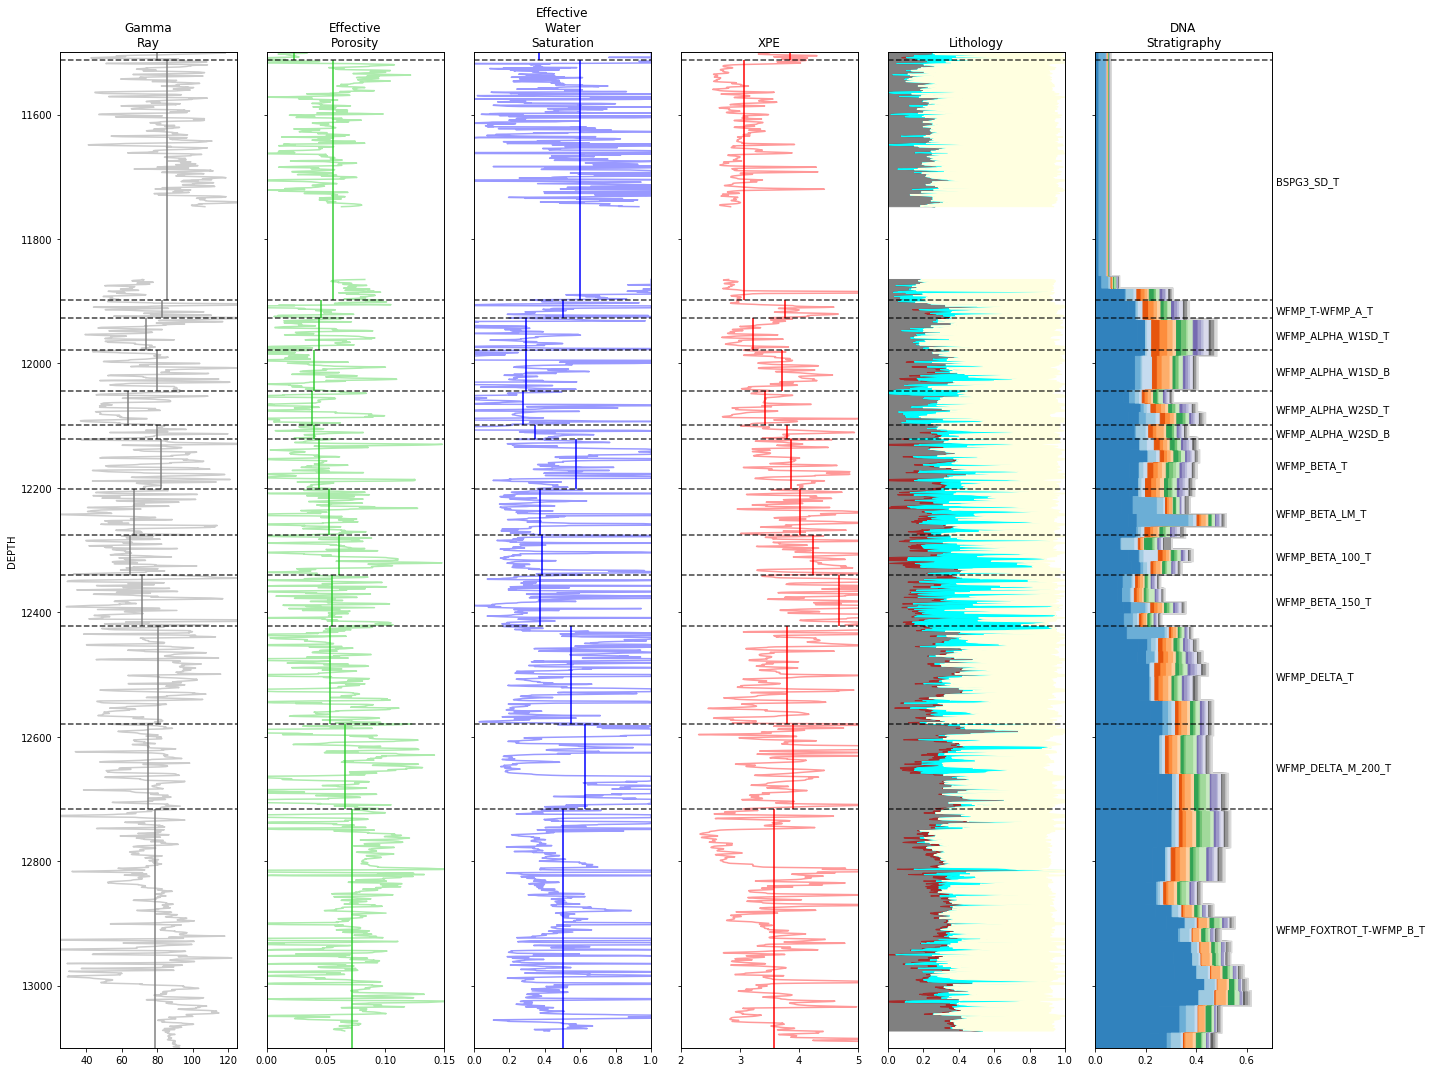

In [60]:
#n = len(LogNames)+2+len(wellorder)
n = len(LogNames)+2
fig, axes = plt.subplots(1,n, figsize=(20,15))
axes = axes.ravel()

# plot petrophysical logs
for log, LogName in enumerate(LogNames):
    axes[log].plot(Logs[LogName], Logs.index, c=LogColors[log], alpha=0.4)       
    for i, r in AvgProp.iterrows():
        axes[log].vlines(x=r[LogName], ymin=formations.loc[i]['min'], ymax=formations.loc[i]['max'], color=LogColors[log])
    axes[log].set_ylim(11500,13100)
    #axes[log].set_xlim(LogMin[log],LogMax[log])
    axes[log].set_xlim(LogMin[log],LogMax[log])
    axes[log].invert_yaxis()
    if log==0:
        axes[log].set(ylabel='DEPTH', xlabel='', title=LogTitle[log])
    else:
        axes[log].set_yticklabels([])
        axes[log].set(title=LogTitle[log])
        
# plot lithology
left = pd.Series(index=Lithology.index).fillna(0)
for e, c in enumerate(Lithology.columns[0:4]):
    axes[log+1].fill_betweenx(Lithology[c].index, left, left + Lithology[c],
                 color=Lithology_colors[e])
    left += Lithology[c]
axes[log+1].set(xlim=(0, 1))
axes[log+1].set_ylim(11500,13100)
axes[log+1].invert_yaxis()
axes[log+1].set(title='Lithology')
axes[log+1].set_yticklabels([])

# plot DNA Stratigraphy
left = pd.Series(index=DNAMarkers.index).fillna(0)
for e, c in enumerate(DNAMarkers.columns[0:29]):
    axes[log+2].fill_betweenx(DNAMarkers[c].index, left, left + DNAMarkers[c],
                 color=colors_dict[c])
    left += DNAMarkers[c]
axes[log+2].set(xlim=(0, 0.7))
axes[log+2].set_ylim(11500,13100)
axes[log+2].invert_yaxis()
#axes[l+2].set(ylabel='DEPTH', xlabel='', title='DNA Stratigraphy')
axes[log+2].set(title='DNA\nStratigraphy')
axes[log+2].set_yticklabels([])

    
## Add in formation tops using a 2nd axis for both plots
for j in range(0,n):
    ax2 = axes[j].twinx() 

    ytick, ylabel = [], []

    # Code for adding in formation dashed lines and labels
    for ii, r in formations.iterrows():
        ax2.axhline(r['min'], ls='--', color='k', alpha=0.75)
        ytick.append(0.5*(r['min']+r['max']))
        if j==(n-1): ylabel.append(ii)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        ax2.set(yticks=ytick, yticklabels=ylabel)

    ax2.set_ylim(axes[j].get_ylim())

,
fig.tight_layout()
fig.savefig('composite_plot.png', dpi=100, bbox_inches='tight')

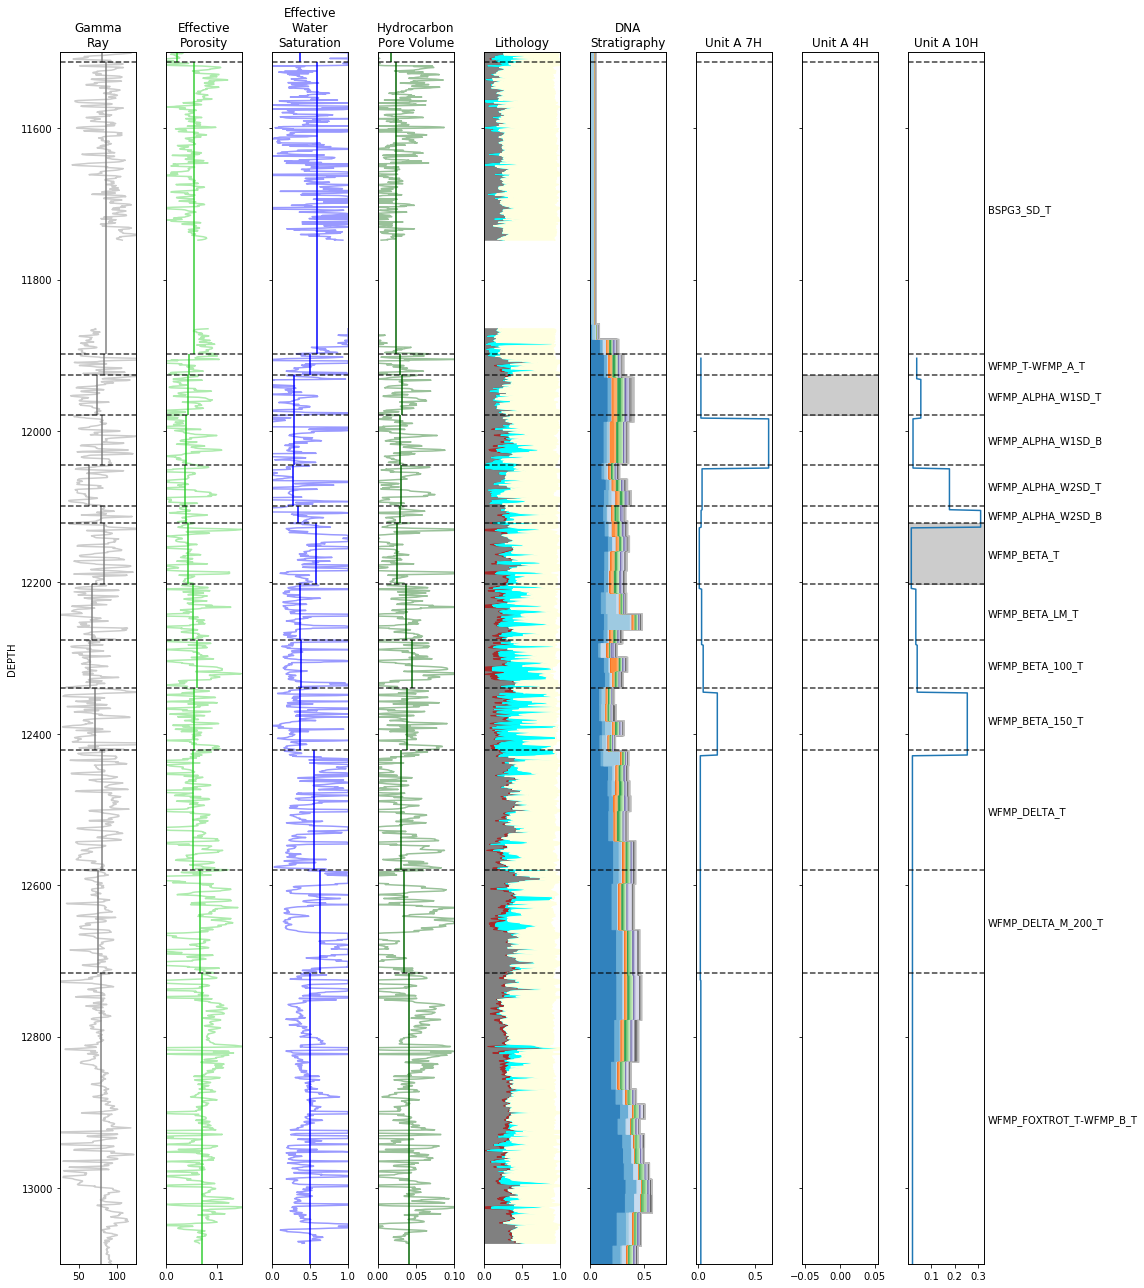

In [27]:
n = len(LogNames)+2+len(wellorder)
fig, axes = plt.subplots(1,n, figsize=(16,18))
axes = axes.ravel()

# plot petrophysical logs
for l, LogName in enumerate(LogNames):

    axes[l].plot(Logs[LogName], Logs.index, c=LogColors[l], alpha=0.4)       
    for i, r in AvgProp.iterrows():
        axes[l].vlines(x=r[LogName], ymin=formations.loc[i]['min'], ymax=formations.loc[i]['max'], color=LogColors[l])
    axes[l].set_ylim(11500,13100)
    axes[l].set_xlim(LogMin[l],LogMax[l])
    axes[l].invert_yaxis()
    if l==0:
        axes[l].set(ylabel='DEPTH', xlabel='', title=LogTitle[l])
    else:
        axes[l].set_yticklabels([])
        axes[l].set(title=LogTitle[l])
        
# plot lithology
left = pd.Series(index=Lithology.index).fillna(0)
for e, c in enumerate(Lithology.columns[0:4]):
    axes[l+1].fill_betweenx(Lithology[c].index, left, left + Lithology[c],
                 color=Lithology_colors[e])
    left += Lithology[c]
axes[l+1].set(xlim=(0, 1))
axes[l+1].set_ylim(11500,13100)
axes[l+1].invert_yaxis()
axes[l+1].set(title='Lithology')
axes[l+1].set_yticklabels([])

# plot DNA Stratigraphy
left = pd.Series(index=DNAMarkers.index).fillna(0)
for e, c in enumerate(DNAMarkers.columns[0:19]):
    axes[l+2].fill_betweenx(DNAMarkers[c].index, left, left + DNAMarkers[c],
                 color=colors_dict[c])
    left += DNAMarkers[c]
axes[l+2].set(xlim=(0, 0.7))
axes[l+2].set_ylim(11500,13100)
axes[l+2].invert_yaxis()
#axes[l+2].set(ylabel='DEPTH', xlabel='', title='DNA Stratigraphy')
axes[l+2].set(title='DNA\nStratigraphy')
axes[l+2].set_yticklabels([])

for k, well in enumerate(wellorder):
    g = DNAContrib.loc[DNAContrib.Well==well].copy()
    DNAContribution = g.iloc[:,3:]
    df = pd.DataFrame({'DNA_Contribution' : DNAContribution.mean(), 'DEPTH': DNAContribution.columns})
    df.DEPTH = pd.to_numeric(df.DEPTH)
    axes[l+k+3].plot(df.DNA_Contribution, df.DEPTH)
    axes[l+k+3].set_ylim(11500,13100)
    axes[l+k+3].invert_yaxis()
    #axes[l+k+3].set(title=well[15:])
    axes[l+k+3].set(title="%s"%(well.replace("silvertip.76.7.","").replace("unit","Unit").replace("."," ").replace('a','A').replace('b','B').replace('h','H')))
    axes[l+k+3].set_yticklabels([])
    
    try:
        form = well_landing[well]
        i = formations.index.tolist().index(form)
        axes[l+k+3].axhspan(formations.iloc[i][['max']], formations.iloc[i][['min']], color='k', alpha=0.2)
    except:
        pass
    
## Add in formation tops using a 2nd axis for both plots
for j in range(0,n):
    ax2 = axes[j].twinx() 

    ytick, ylabel = [], []

    # Code for adding in formation dashed lines and labels
    for ii, r in formations.iterrows():
        ax2.axhline(r['min'], ls='--', color='k', alpha=0.75)
        ytick.append(0.5*(r['min']+r['max']))
        if j==(n-1): ylabel.append(ii)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        ax2.set(yticks=ytick, yticklabels=ylabel)

    ax2.set_ylim(axes[j].get_ylim())

,
fig.tight_layout()
fig.savefig('composite_plot_avg.png', dpi=100, bbox_inches='tight')

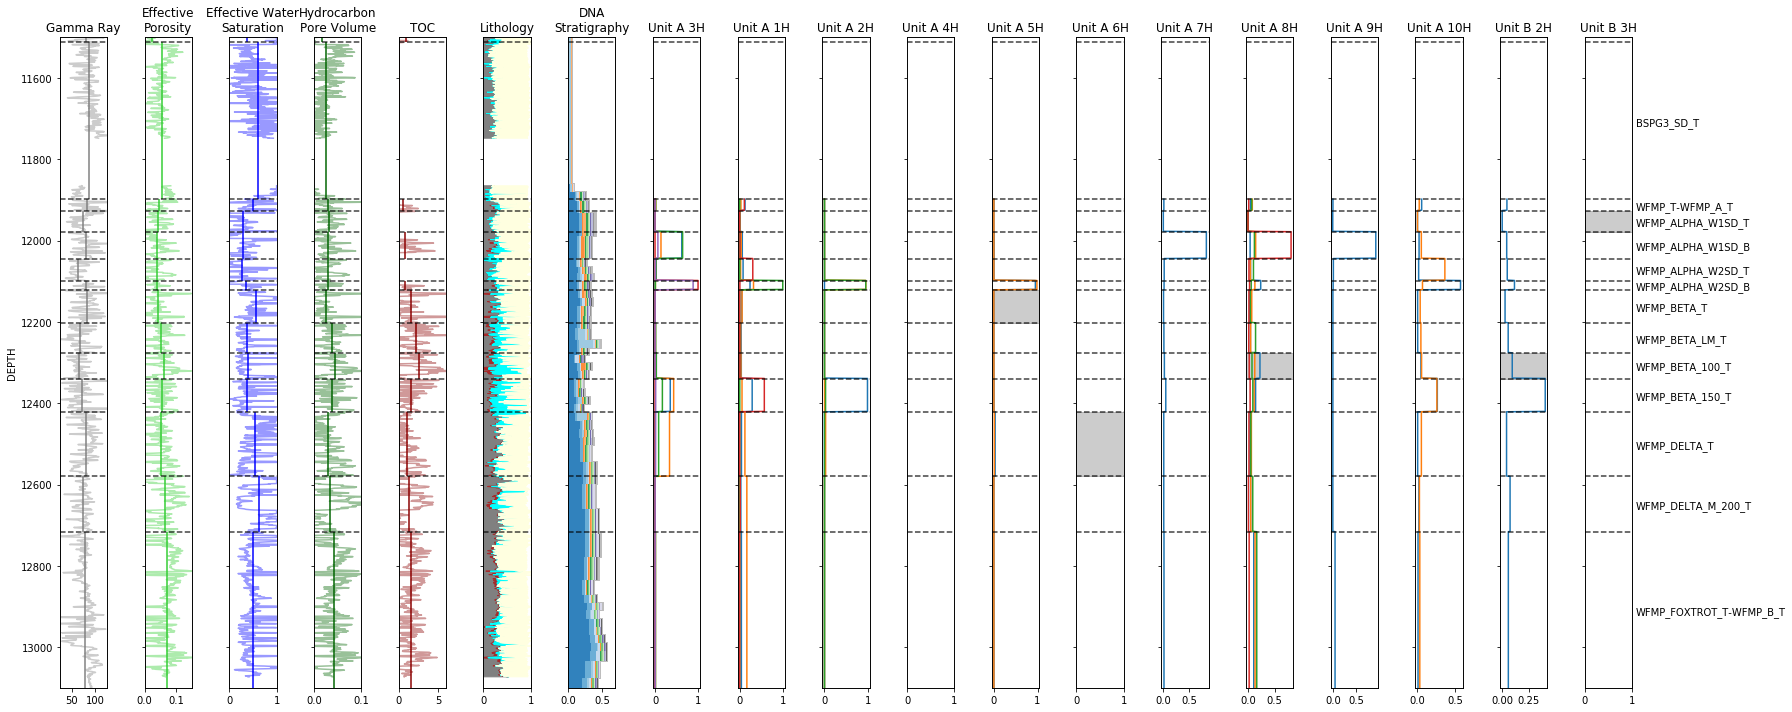

In [53]:
n = len(LogNames)+2+len(wellorder)
fig, axes = plt.subplots(1,n, figsize=(16,18))
axes = axes.ravel()

# plot petrophysical logs
for l, LogName in enumerate(LogNames):

    axes[l].plot(Logs[LogName], Logs.index, c=LogColors[l], alpha=0.4)       
    for i, r in AvgProp.iterrows():
        axes[l].vlines(x=r[LogName], ymin=formations.loc[i]['min'], ymax=formations.loc[i]['max'], color=LogColors[l])
    axes[l].set_ylim(11500,13100)
    axes[l].set_xlim(LogMin[l],LogMax[l])
    axes[l].invert_yaxis()
    if l==0:
        axes[l].set(ylabel='DEPTH', xlabel='', title=LogTitle[l])
    else:
        axes[l].set_yticklabels([])
        axes[l].set(title=LogTitle[l])
        
# plot lithology
left = pd.Series(index=Lithology.index).fillna(0)
for e, c in enumerate(Lithology.columns[0:4]):
    axes[l+1].fill_betweenx(Lithology[c].index, left, left + Lithology[c],
                 color=Lithology_colors[e])
    left += Lithology[c]
axes[l+1].set(xlim=(0, 1))
axes[l+1].set_ylim(11500,13100)
axes[l+1].invert_yaxis()
axes[l+1].set(title='Lithology')
axes[l+1].set_yticklabels([])

# plot DNA Stratigraphy
left = pd.Series(index=DNAMarkers.index).fillna(0)
for e, c in enumerate(DNAMarkers.columns[0:19]):
    axes[l+2].fill_betweenx(DNAMarkers[c].index, left, left + DNAMarkers[c],
                 color=colors_dict[c])
    left += DNAMarkers[c]
axes[l+2].set(xlim=(0, 0.7))
axes[l+2].set_ylim(11500,13100)
axes[l+2].invert_yaxis()
#axes[l+2].set(ylabel='DEPTH', xlabel='', title='DNA Stratigraphy')
axes[l+2].set(title='DNA\nStratigraphy')
axes[l+2].set_yticklabels([])

for k, well in enumerate(wellorder):
    g = DNAContrib2.loc[DNAContrib2.Well==well].copy()
    for date in g.CollectionDate.unique():
        DNAContribution = g.loc[g.CollectionDate==date].iloc[:,3:]
        df = pd.DataFrame({'DNA_Contribution' : DNAContribution.mean(), 'DEPTH': DNAContribution.columns})
        df.DEPTH = pd.to_numeric(df.DEPTH)
        axes[l+k+3].plot(df.DNA_Contribution, df.DEPTH)
    axes[l+k+3].set_ylim(11500,13100)
    axes[l+k+3].invert_yaxis()
    #axes[l+k+3].set(title=well[15:])
    axes[l+k+3].set(title="%s"%(well.replace("silvertip.76.7.","").replace("unit","Unit").replace("."," ").replace('a','A').replace('b','B').replace('h','H')))
    axes[l+k+3].set_yticklabels([])
    
    try:
        form = well_landing[well]
        i = formations.index.tolist().index(form)
        axes[l+k+3].axhspan(formations.iloc[i][['max']], formations.iloc[i][['min']], color='k', alpha=0.2)
    except:
        pass
    
## Add in formation tops using a 2nd axis for both plots
for j in range(0,n):
    ax2 = axes[j].twinx() 

    ytick, ylabel = [], []

    # Code for adding in formation dashed lines and labels
    for ii, r in formations.iterrows():
        ax2.axhline(r['min'], ls='--', color='k', alpha=0.75)
        ytick.append(0.5*(r['min']+r['max']))
        if j==(n-1): ylabel.append(ii)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        ax2.set(yticks=ytick, yticklabels=ylabel)

    ax2.set_ylim(axes[j].get_ylim())

,
fig.tight_layout()
fig.savefig('composite_plot_high_replicates.png', dpi=100, bbox_inches='tight')

NameError: name 'DNAContrib2' is not defined

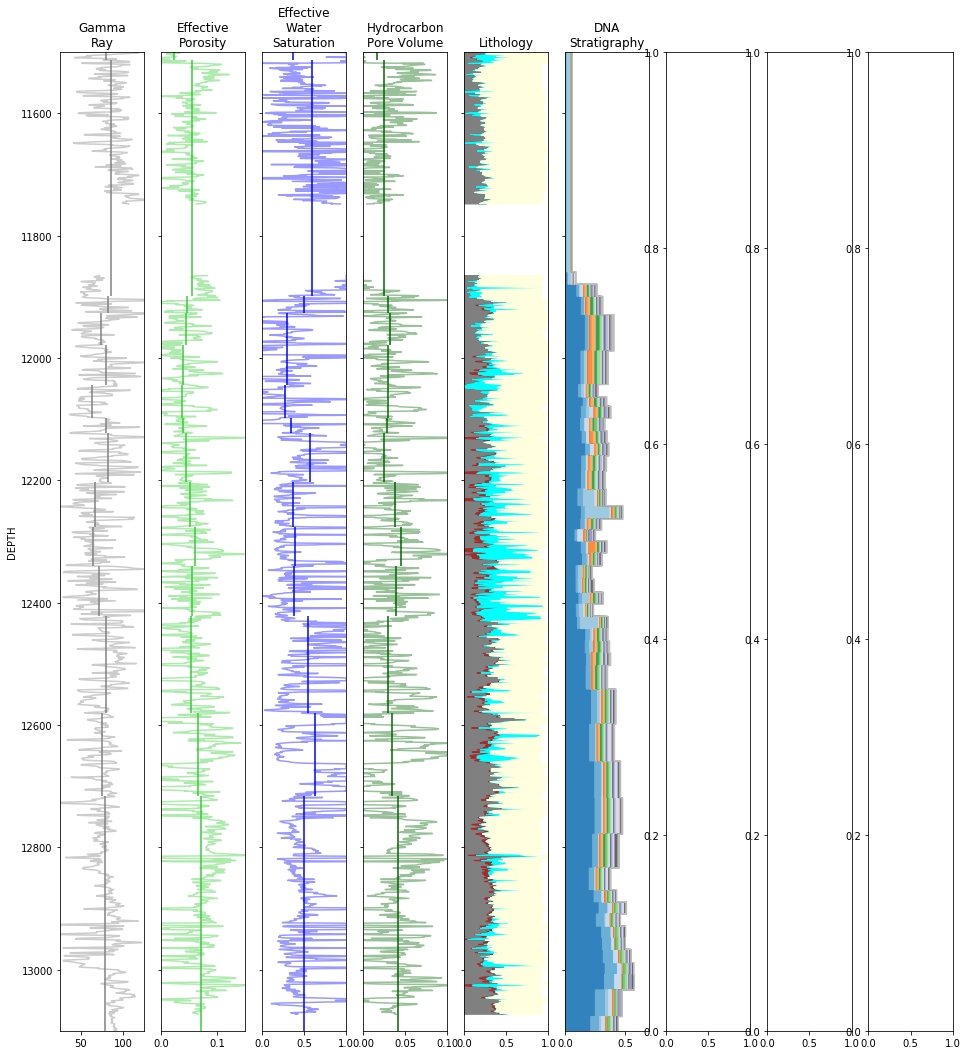

In [28]:
n = len(LogNames)+2+len(wellorder)
fig, axes = plt.subplots(1,n, figsize=(16,18))
axes = axes.ravel()

# plot petrophysical logs
for l, LogName in enumerate(LogNames):

    axes[l].plot(Logs[LogName], Logs.index, c=LogColors[l], alpha=0.4)       
    for i, r in AvgProp.iterrows():
        axes[l].vlines(x=r[LogName], ymin=formations.loc[i]['min'], ymax=formations.loc[i]['max'], color=LogColors[l])
    axes[l].set_ylim(11500,13100)
    axes[l].set_xlim(LogMin[l],LogMax[l])
    axes[l].invert_yaxis()
    if l==0:
        axes[l].set(ylabel='DEPTH', xlabel='', title=LogTitle[l])
    else:
        axes[l].set_yticklabels([])
        axes[l].set(title=LogTitle[l])
        
# plot lithology
left = pd.Series(index=Lithology.index).fillna(0)
for e, c in enumerate(Lithology.columns[0:4]):
    axes[l+1].fill_betweenx(Lithology[c].index, left, left + Lithology[c],
                 color=Lithology_colors[e])
    left += Lithology[c]
axes[l+1].set(xlim=(0, 1))
axes[l+1].set_ylim(11500,13100)
axes[l+1].invert_yaxis()
axes[l+1].set(title='Lithology')
axes[l+1].set_yticklabels([])

# plot DNA Stratigraphy
left = pd.Series(index=DNAMarkers.index).fillna(0)
for e, c in enumerate(DNAMarkers.columns[0:19]):
    axes[l+2].fill_betweenx(DNAMarkers[c].index, left, left + DNAMarkers[c],
                 color=colors_dict[c])
    left += DNAMarkers[c]
axes[l+2].set(xlim=(0, 0.7))
axes[l+2].set_ylim(11500,13100)
axes[l+2].invert_yaxis()
#axes[l+2].set(ylabel='DEPTH', xlabel='', title='DNA Stratigraphy')
axes[l+2].set(title='DNA\nStratigraphy')
axes[l+2].set_yticklabels([])

for k, well in enumerate(wellorder):
    g = DNAContrib2.loc[DNAContrib2.Well==well].copy()
    DNAContribution = g.iloc[:,3:]
    df = pd.DataFrame({'DNA_Contribution' : DNAContribution.mean(), 'DEPTH': DNAContribution.columns})
    df.DEPTH = pd.to_numeric(df.DEPTH)
    axes[l+k+3].plot(df.DNA_Contribution, df.DEPTH)
    axes[l+k+3].set_ylim(11500,13100)
    axes[l+k+3].invert_yaxis()
    #axes[l+k+3].set(title=well[15:])
    axes[l+k+3].set(title="%s"%(well.replace("silvertip.76.7.","").replace("unit","Unit").replace("."," ").replace('a','A').replace('b','B').replace('h','H')))
    axes[l+k+3].set_yticklabels([])
    
    try:
        form = well_landing[well]
        i = formations.index.tolist().index(form)
        axes[l+k+3].axhspan(formations.iloc[i][['max']], formations.iloc[i][['min']], color='k', alpha=0.2)
    except:
        pass
    
## Add in formation tops using a 2nd axis for both plots
for j in range(0,n):
    ax2 = axes[j].twinx() 

    ytick, ylabel = [], []

    # Code for adding in formation dashed lines and labels
    for ii, r in formations.iterrows():
        ax2.axhline(r['min'], ls='--', color='k', alpha=0.75)
        ytick.append(0.5*(r['min']+r['max']))
        if j==(n-1): ylabel.append(ii)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        ax2.set(yticks=ytick, yticklabels=ylabel)

    ax2.set_ylim(axes[j].get_ylim())

,
#fig.tight_layout()
plt.subplots_adjust(wspace=0.35)
fig.savefig('composite_plot_high_replicates_avg.png', dpi=100, bbox_inches='tight')

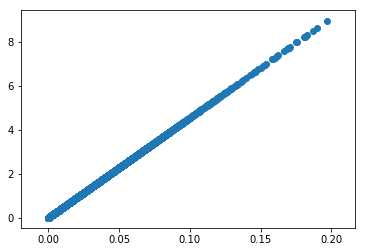

In [100]:
plt.scatter(Logs.PT_VKER, Logs.PT_LOG_TOC)

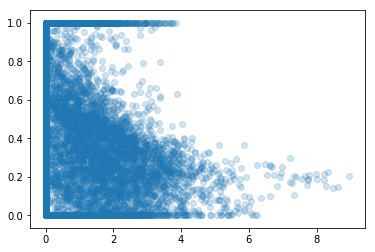

In [104]:
plt.scatter(Logs.PT_LOG_TOC, Logs.PT_SWE, alpha=0.2)

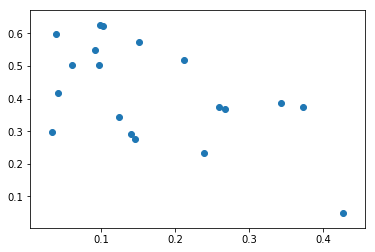

In [68]:
plt.scatter(AvgProp.PT_VLIME, AvgProp.PT_SWE)

In [25]:
l=0

In [42]:
# logs to be plotted: Gamma Ray, Resistivity, Density Porosity
LogNames = ['PT_PHIE']
LogColors = ['darkgreen']
LogTitle = ['Effective Porosity']
LogMin = [0]
LogMax = [0.15]

In [43]:
LogName=LogNames[l]

In [44]:
wellorder = [ 'silvertip.76.7.unit.a.1h',
                   'silvertip.76.7.unit.a.8h',
                   'silvertip.76.7.unit.b.2h']

In [84]:
welllabels = ['Well 1','Well 2', 'Well 3']

In [45]:
wellcolor = ['orange','red','blue']

In [47]:
wellcolor = ['#F48E06', '#F70337', '#039CE8']

In [57]:
formations_Mock = pd.read_csv('Silvertip_Tops_TVD_Mock.csv', index_col=0)

In [58]:
formations_Mock

,min,max
Formation,,
A1,11898.05814,11926.36170
A2,11926.36170,11978.43876
A3,11978.43876,12044.55341
A4,12044.55341,12098.65341
A5,12098.65341,12121.78903
B1,12121.78903,12202.56763
B2,12202.56763,12276.28790
B3,12276.28790,12339.35065
B4,12339.35065,12421.75804


In [80]:
df0 = Logs.rolling(window=10).mean()

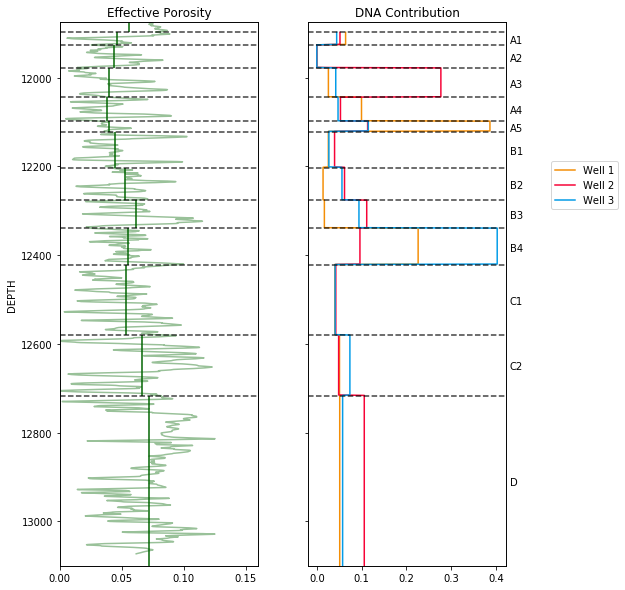

In [88]:
n = 2
fig, axes = plt.subplots(1,n, figsize=(8,10))
axes = axes.ravel()

# plot petrophysical log
l = 0
LogName=LogNames[l]
axes[l].plot(df0[LogName], df0.index, c=LogColors[l], alpha=0.4)       
for i, r in AvgProp.iterrows():
    axes[l].vlines(x=r[LogName], ymin=formations.loc[i]['min'], ymax=formations.loc[i]['max'], color=LogColors[l])
axes[l].set_ylim(11875,13100)
axes[l].set_xlim(0,0.16)
axes[l].invert_yaxis()
if l==0:
    axes[l].set(ylabel='DEPTH', xlabel='', title=LogTitle[l])
else:
    axes[l].set_yticklabels([])
    axes[l].set(title=LogTitle[l])
    

for k, well in enumerate(wellorder):
    g = DNAContrib2.loc[DNAContrib2.Well==well].copy()
    DNAContribution = g.iloc[:,3:]
    df = pd.DataFrame({'DNA_Contribution' : DNAContribution.mean(), 'DEPTH': DNAContribution.columns})
    df.DEPTH = pd.to_numeric(df.DEPTH)
    axes[l+1].plot(df.DNA_Contribution, df.DEPTH, color=wellcolor[k], label=welllabels[k])
axes[l+1].set_ylim(11875,13100)
axes[l+1].invert_yaxis()
#axes[l+1].set(title="%s"%(well.replace("silvertip.76.7.","").replace("unit","Unit").replace("."," ").replace('a','A').replace('b','B').replace('h','H')))
axes[l+1].set_yticklabels([])
axes[l+1].set(title='DNA Contribution')
axes[l+1].legend(loc='center left', bbox_to_anchor=(1.2, 0.7))
    
## Add in formation tops using a 2nd axis for both plots
for j in range(0,n):
    ax2 = axes[j].twinx() 

    ytick, ylabel = [], []

    # Code for adding in formation dashed lines and labels
    for ii, r in formations_Mock.iterrows():
        ax2.axhline(r['min'], ls='--', color='k', alpha=0.75)
        ytick.append(0.5*(r['min']+r['max']))
        if j==(n-1): ylabel.append(ii)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        ax2.set(yticks=ytick, yticklabels=ylabel)

    ax2.set_ylim(axes[j].get_ylim())

,
#fig.tight_layout()
plt.subplots_adjust(wspace=0.25)
fig.savefig('BDdeck.png', dpi=100, bbox_inches='tight')

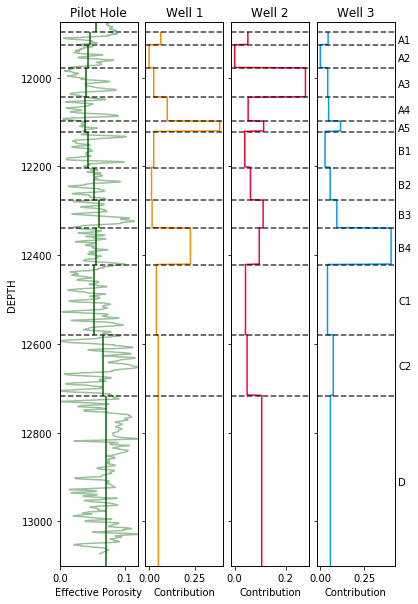

In [95]:
n = 4
fig, axes = plt.subplots(1,n, figsize=(6,10))
axes = axes.ravel()

# plot petrophysical log
l = 0
LogName=LogNames[l]
axes[l].plot(df0[LogName], df0.index, c=LogColors[l], alpha=0.4)       
for i, r in AvgProp.iterrows():
    axes[l].vlines(x=r[LogName], ymin=formations.loc[i]['min'], ymax=formations.loc[i]['max'], color=LogColors[l])
axes[l].set_ylim(11875,13100)
axes[l].set_xlim(0,0.12)
axes[l].invert_yaxis()
if l==0:
    axes[l].set(ylabel='DEPTH', xlabel=LogTitle[l], title='Pilot Hole')
else:
    axes[l].set_yticklabels([])
    axes[l].set(title=LogTitle[l])
    

for k, well in enumerate(wellorder):
    g = DNAContrib2.loc[DNAContrib2.Well==well].copy()
    DNAContribution = g.iloc[:,3:]
    df = pd.DataFrame({'DNA_Contribution' : DNAContribution.mean(), 'DEPTH': DNAContribution.columns})
    df.DEPTH = pd.to_numeric(df.DEPTH)
    axes[l+k+1].plot(df.DNA_Contribution, df.DEPTH, color=wellcolor[k], label=welllabels[k])
    axes[l+k+1].set_ylim(11875,13100)
    axes[l+k+1].invert_yaxis()
    #axes[l+k+1].set(title="%s"%(well.replace("silvertip.76.7.","").replace("unit","Unit").replace("."," ").replace('a','A').replace('b','B').replace('h','H')))
    axes[l+k+1].set_yticklabels([])
    axes[l+k+1].set(xlabel='Contribution', title=welllabels[k])
    
## Add in formation tops using a 2nd axis for both plots
for j in range(0,n):
    ax2 = axes[j].twinx() 

    ytick, ylabel = [], []

    # Code for adding in formation dashed lines and labels
    for ii, r in formations_Mock.iterrows():
        ax2.axhline(r['min'], ls='--', color='k', alpha=0.75)
        ytick.append(0.5*(r['min']+r['max']))
        if j==(n-1): ylabel.append(ii)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        ax2.set(yticks=ytick, yticklabels=ylabel)

    ax2.set_ylim(axes[j].get_ylim())

,
#fig.tight_layout()
plt.subplots_adjust(wspace=0.1)
fig.savefig('BDdeck2.png', dpi=100, bbox_inches='tight')